In [116]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [117]:
path = ('C:\\Users\\Greg\\Documents\\School\\CSUF Volunteer project\\Suicide PHIT Data Story.xlsx')
df = pd.read_excel(path)
df = df.rename(columns ={'Category: Mental Health: Suicide': 'Years', 'Unnamed: 1':'Race/Ethnicity', 'Unnamed: 2': 'Measure', 'Unnamed: 3': 'Age-Adjusted Death Rate per 100,000' })
df.drop([0,1,2,3], inplace = True)
df.head()



,Years,Race/Ethnicity,Measure,"Age-Adjusted Death Rate per 100,000"
4,2020,"White, NH",Suicide Rate,9.6
5,2020,"Black, NH",Suicide Rate,4.4
6,2020,"Asian, NH",Suicide Rate,4.8
7,2020,Hispanic,Suicide Rate,5.3
8,2019,"White, NH",Suicide Rate,10.1


In [118]:
print(df.columns)

Index(['Years', 'Race/Ethnicity', 'Measure',
       'Age-Adjusted Death Rate per 100,000'],
      dtype='object')


In [119]:
df.duplicated()

4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
dtype: bool

In [120]:
df.drop_duplicates()

,Years,Race/Ethnicity,Measure,"Age-Adjusted Death Rate per 100,000"
4,2020,"White, NH",Suicide Rate,9.6
5,2020,"Black, NH",Suicide Rate,4.4
6,2020,"Asian, NH",Suicide Rate,4.8
7,2020,Hispanic,Suicide Rate,5.3
8,2019,"White, NH",Suicide Rate,10.1
9,2019,"Black, NH",Suicide Rate,5.5
10,2019,"Asian, NH",Suicide Rate,3.4
11,2019,Hispanic,Suicide Rate,4.8
12,2018,"White, NH",Suicide Rate,11.5
13,2018,"Black, NH",Suicide Rate,6.1


In [121]:
df.shape

(52, 4)

In [122]:
df.dtypes

Years                                  object
Race/Ethnicity                         object
Measure                                object
Age-Adjusted Death Rate per 100,000    object
dtype: object

In [123]:
df_2020 = df[df['Years'] == 2020]
df_2019 = df[df['Years'] == 2019]
df_2018 = df[df['Years'] == 2018]
df_2017 = df[df['Years'] == 2017]
print(df_2017)

   Years Race/Ethnicity       Measure Age-Adjusted Death Rate per 100,000
16  2017      White, NH  Suicide Rate                                  11
17  2017      Black, NH  Suicide Rate                                 3.8
18  2017      Asian, NH  Suicide Rate                                 5.5
19  2017       Hispanic  Suicide Rate                                 6.8


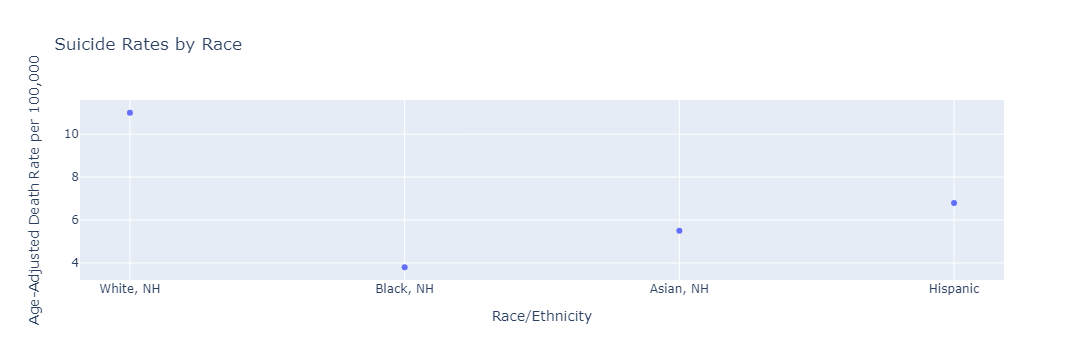

In [124]:
fig = px.scatter(df_2017, x="Race/Ethnicity", y="Age-Adjusted Death Rate per 100,000", title = "Suicide Rates by Race")
fig.show()

In [125]:
df_hispanic = df[df['Race/Ethnicity'] == 'Hispanic']
df_nh = df[df['Race/Ethnicity'] != 'Hispanic']
# Display the filtered DataFrame
print(df_hispanic)
print(df_nh)

   Years Race/Ethnicity       Measure Age-Adjusted Death Rate per 100,000
7   2020       Hispanic  Suicide Rate                                 5.3
11  2019       Hispanic  Suicide Rate                                 4.8
15  2018       Hispanic  Suicide Rate                                 4.3
19  2017       Hispanic  Suicide Rate                                 6.8
23  2016       Hispanic  Suicide Rate                                   5
27  2015       Hispanic  Suicide Rate                                 5.3
31  2014       Hispanic  Suicide Rate                                 5.2
35  2013       Hispanic  Suicide Rate                                 4.5
39  2011       Hispanic  Suicide Rate                                 3.2
43  2010       Hispanic  Suicide Rate                                 3.2
47  2009       Hispanic  Suicide Rate                                 4.4
51  2008       Hispanic  Suicide Rate                                   4
55  2007       Hispanic  Suicide Rate 

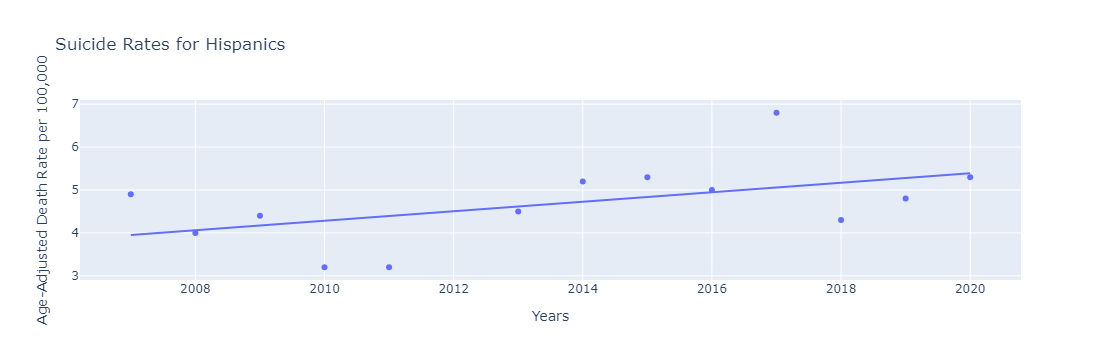

In [126]:
import numpy as np
import matplotlib.pyplot as plt
x = df['Years']
y = df['Age-Adjusted Death Rate per 100,000']


fig = px.scatter(df_hispanic, x="Years", y="Age-Adjusted Death Rate per 100,000",trendline = 'ols',title = "Suicide Rates for Hispanics")
fig.show()

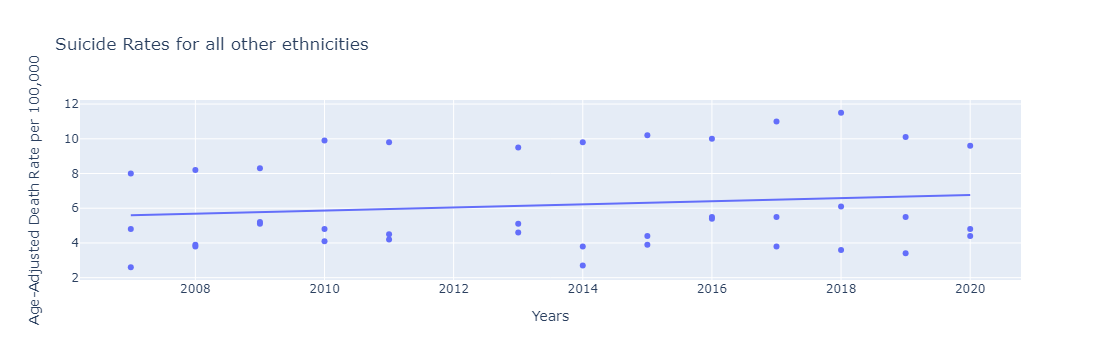

In [127]:
fig = px.scatter(df_nh, x="Years", y="Age-Adjusted Death Rate per 100,000",trendline = 'ols', title = "Suicide Rates for all other ethnicities")
fig.show()

Combined Non-Hispanic number:  241.40000000000003
Combined Hispanic number:  60.900000000000006


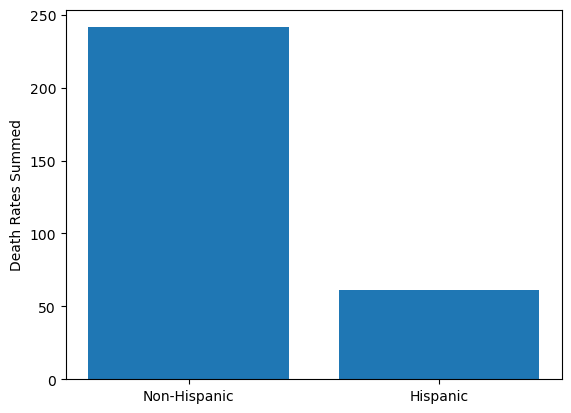

In [128]:
combined_df_nh = df_nh["Age-Adjusted Death Rate per 100,000"].sum()

combined_df_hispanic = df_hispanic["Age-Adjusted Death Rate per 100,000"].sum()

print("Combined Non-Hispanic number: ", combined_df_nh)
print("Combined Hispanic number: ", combined_df_hispanic)
summed_numbers = [combined_df_nh, combined_df_hispanic]
summed_labels = ['Non-Hispanic', 'Hispanic']
plt.ylabel("Death Rates Summed")
plt.bar(summed_labels, summed_numbers)
plt.show()



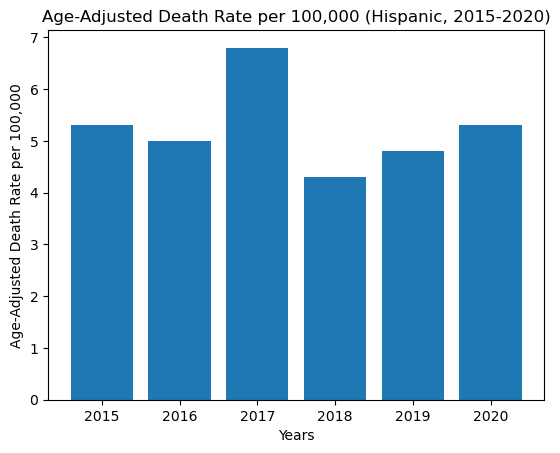

In [129]:
df_hispanic_fiveyears = df_hispanic[(df_hispanic['Years'] >= 2015) & (df_hispanic['Years'] <= 2020)]
plt.bar(df_hispanic_fiveyears['Years'], df_hispanic_fiveyears['Age-Adjusted Death Rate per 100,000'])
plt.xlabel('Years')
plt.ylabel('Age-Adjusted Death Rate per 100,000')
plt.title('Age-Adjusted Death Rate per 100,000 (Hispanic, 2015-2020)')
plt.show()

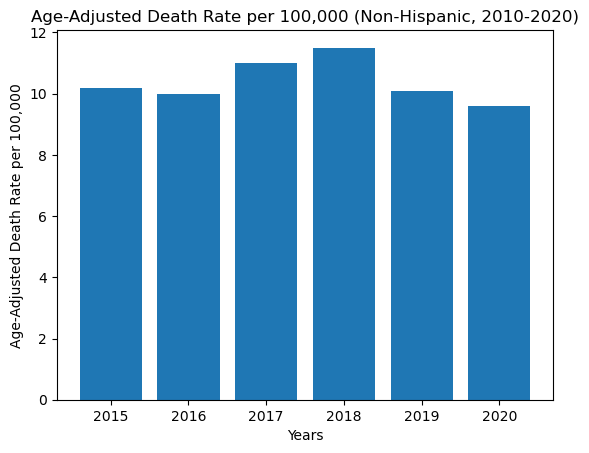

In [130]:
df_nh_fiveyears = df_nh[(df_nh['Years'] >= 2015) & (df_nh['Years'] <= 2020)]
plt.bar(df_nh_fiveyears['Years'], df_nh_fiveyears['Age-Adjusted Death Rate per 100,000'])
plt.xlabel('Years')
plt.ylabel('Age-Adjusted Death Rate per 100,000')
plt.title('Age-Adjusted Death Rate per 100,000 (Non-Hispanic, 2010-2020)')
plt.show()

Predicting data for 2020 using 2015 - 2019

Predicted Age-Adjusted Death Rate per 100,000 for 2020: 4.730000000000018


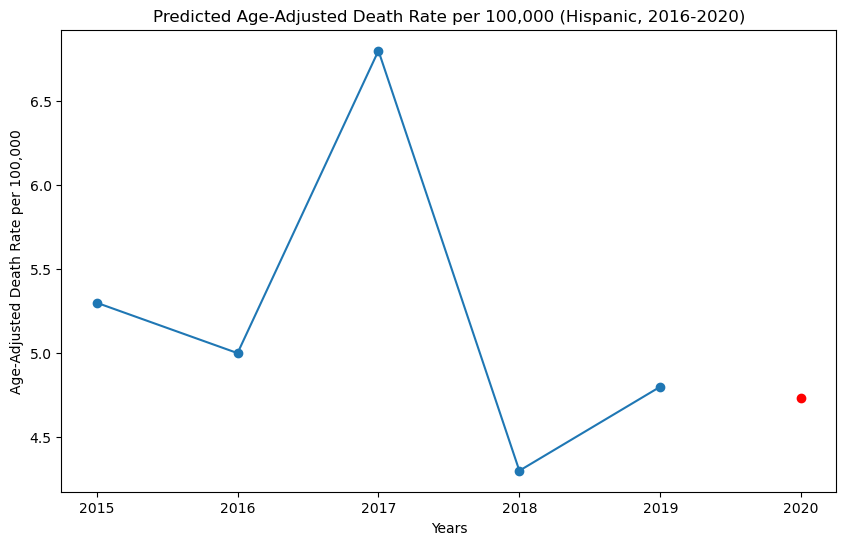

In [131]:
from sklearn.linear_model import LinearRegression

df_hispanic_fouryears = df_hispanic[(df_hispanic['Years'] >= 2015) & (df_hispanic['Years'] <= 2019)]
x = df_hispanic_fouryears["Years"].values.reshape(-1,1)
y = df_hispanic_fouryears["Age-Adjusted Death Rate per 100,000"]

mod = LinearRegression()
mod.fit(x,y)

fith_year = np.array([[2020]])
predicted_rate_2020 = mod.predict(fith_year)

print(f'Predicted Age-Adjusted Death Rate per 100,000 for 2020: {predicted_rate_2020[0]}')


plt.figure(figsize=(10, 6))
plt.plot(df_hispanic_fouryears['Years'], df_hispanic_fouryears['Age-Adjusted Death Rate per 100,000'], marker='o', label='Actual Data')
plt.scatter(2020, predicted_rate_2020, color='red', label='Predicted 2020')
plt.xlabel('Years')
plt.ylabel('Age-Adjusted Death Rate per 100,000')
plt.title('Predicted Age-Adjusted Death Rate per 100,000 (Hispanic, 2016-2020)')
plt.show()




Actual 2020 statistic was 5.3


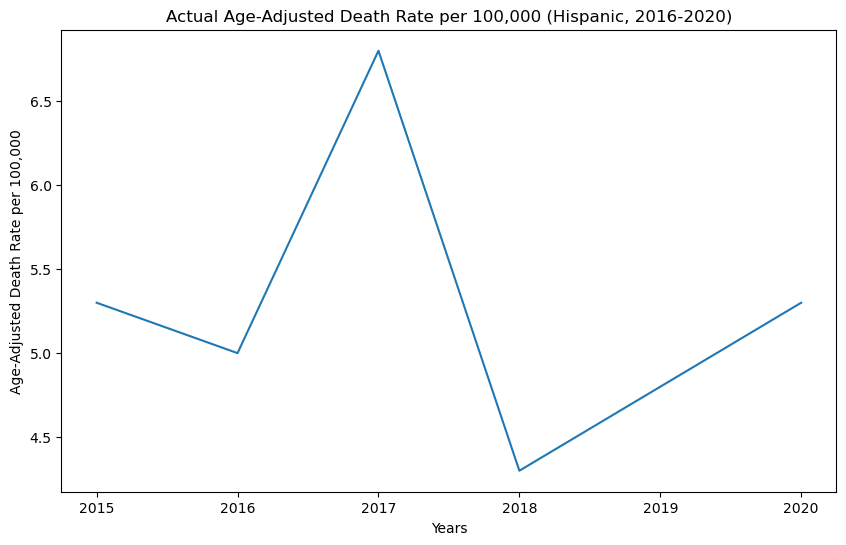

In [132]:
actual2020 = df_hispanic_fiveyears['Age-Adjusted Death Rate per 100,000'].values[0]

print(f"Actual 2020 statistic was {actual2020}")
plt.figure(figsize=(10, 6))
plt.plot(df_hispanic_fiveyears['Years'], df_hispanic_fiveyears['Age-Adjusted Death Rate per 100,000'])
plt.xlabel('Years')
plt.ylabel('Age-Adjusted Death Rate per 100,000')
plt.title('Actual Age-Adjusted Death Rate per 100,000 (Hispanic, 2016-2020)')

plt.show()

In [133]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

actual2020 = np.array([actual2020])
predicted_rate_2020 = np.array([predicted_rate_2020])

mae = mean_absolute_error(actual2020, predicted_rate_2020)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
mse = mean_squared_error(actual2020, predicted_rate_2020)
print(f"Mean Squared Error (MSE): {mse:.2f}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 0.57
Mean Squared Error (MSE): 0.32
Root Mean Squared Error (RMSE): 0.57
